In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
sample_sales_data = pd.read_csv('sample_sales_data.csv')
sensor_stock_levels = pd.read_csv('sensor_stock_levels.csv')
sensor_storage_temperature = pd.read_csv('sensor_storage_temperature.csv')

In [3]:

# Convert timestamps to datetime objects and round to the nearest hour
sample_sales_data['timestamp'] = pd.to_datetime(sample_sales_data['timestamp']).dt.floor('H')
sensor_stock_levels['timestamp'] = pd.to_datetime(sensor_stock_levels['timestamp']).dt.floor('H')
sensor_storage_temperature['timestamp'] = pd.to_datetime(sensor_storage_temperature['timestamp']).dt.floor('H')

# Merge sample_sales_data with sensor_stock_levels on both timestamp and product_id
merged_data = pd.merge(sample_sales_data, sensor_stock_levels, on=['timestamp', 'product_id'], how='inner', suffixes=('_sales', '_stock'))

# Merge the result with sensor_storage_temperature on timestamp
final_merged_data = pd.merge(merged_data, sensor_storage_temperature, on='timestamp', how='inner')

# Display the first few rows of the merged dataset
print(final_merged_data.head())


C:\Users\Kushagra Gupta\AppData\Local\Temp\ipykernel_18088\24846775.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sample_sales_data['timestamp'] = pd.to_datetime(sample_sales_data['timestamp']).dt.floor('H')
C:\Users\Kushagra Gupta\AppData\Local\Temp\ipykernel_18088\24846775.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sensor_stock_levels['timestamp'] = pd.to_datetime(sensor_stock_levels['timestamp']).dt.floor('H')
C:\Users\Kushagra Gupta\AppData\Local\Temp\ipykernel_18088\24846775.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sensor_storage_temperature['timestamp'] = pd.to_datetime(sensor_storage_temperature['timestamp']).dt.floor('H')


   Unnamed: 0_sales                        transaction_id           timestamp  \
0                 0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed 2022-03-02 09:00:00   
1                 0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed 2022-03-02 09:00:00   
2                 0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed 2022-03-02 09:00:00   
3                 0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed 2022-03-02 09:00:00   
4                 0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed 2022-03-02 09:00:00   

                             product_id category customer_type  unit_price  \
0  3bc6c1ea-0198-46de-9ffd-514ae3338713    fruit          gold        3.99   
1  3bc6c1ea-0198-46de-9ffd-514ae3338713    fruit          gold        3.99   
2  3bc6c1ea-0198-46de-9ffd-514ae3338713    fruit          gold        3.99   
3  3bc6c1ea-0198-46de-9ffd-514ae3338713    fruit          gold        3.99   
4  3bc6c1ea-0198-46de-9ffd-514ae3338713    fruit          gold        3.99   

   quantity  total payment_type  Unnamed: 0_

In [4]:
final_merged_data.head()

,Unnamed: 0_sales,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,Unnamed: 0_stock,id_x,estimated_stock_pct,Unnamed: 0,id_y,temperature
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,6583,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,11,70051222-303f-40d1-b3a7-2a3f1ccd30b1,0.62
1,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,6583,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,145,7787343a-1194-4c80-ac1d-7a111060f7f8,31.24
2,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,6583,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,220,8ec85ca4-680d-47db-9e0b-171acc5410c1,2.20
3,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,6583,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,232,68a50e89-9e35-40aa-a04c-373831e8e01f,-2.50
4,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,6583,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,320,37667f09-db12-4e0a-aeb6-a3062b4aa889,-3.05


In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5639 entries, 0 to 5638
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0_sales     5639 non-null   int64         
 1   transaction_id       5639 non-null   object        
 2   timestamp            5639 non-null   datetime64[ns]
 3   product_id           5639 non-null   object        
 4   category             5639 non-null   object        
 5   customer_type        5639 non-null   object        
 6   unit_price           5639 non-null   float64       
 7   quantity             5639 non-null   int64         
 8   total                5639 non-null   float64       
 9   payment_type         5639 non-null   object        
 10  Unnamed: 0_stock     5639 non-null   int64         
 11  id                   5639 non-null   object        
 12  estimated_stock_pct  5639 non-null   float64       
dtypes: datetime64[ns](1), float64(3),

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Drop columns that are not relevant or cannot be converted easily to numeric
# Assuming 'transaction_id' is such a column. Adjust according to your dataset.
X = merged_data.drop(columns=['estimated_stock_pct', 'transaction_id'])
y = merged_data['estimated_stock_pct']

# Convert all remaining categorical data to numeric
X = pd.get_dummies(X)

# Print dimensions to verify
print(X.shape)
print(y.shape)


(5639, 4674)
(5639,)


In [8]:
# Check data types and convert non-numeric types
for col in X.columns:
    if X[col].dtype == 'object':
        X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col)], axis=1)


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Assume 'merged_data' is already loaded
# Example: merged_data = pd.read_csv('/path/to/your/merged_data.csv')

# Drop non-relevant or non-numeric columns and convert categorical columns
X = merged_data.drop(columns=['estimated_stock_pct', 'transaction_id'])
y = merged_data['estimated_stock_pct']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)  # Handle any NaNs that arise from coercion

# Print dimensions to verify
print(X.shape)
print(y.shape)

# Define number of folds for cross-validation
K = 10
mae_scores = []

# K-Fold Cross-Validation setup
kf = KFold(n_splits=K, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and fit the RandomForest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate MAE
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    print(f"Fold {len(mae_scores)}: MAE = {mae:.3f}")

print(f"Average MAE: {sum(mae_scores) / len(mae_scores):.2f}")


(5639, 4674)
(5639,)
Fold 1: MAE = 0.218
Fold 2: MAE = 0.228
Fold 3: MAE = 0.219
Fold 4: MAE = 0.226
Fold 5: MAE = 0.222
Fold 6: MAE = 0.216
Fold 7: MAE = 0.222
Fold 8: MAE = 0.227
Fold 9: MAE = 0.220
Fold 10: MAE = 0.223
Average MAE: 0.22


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your features and target variable for training
rfmodel_feat = RandomForestRegressor(random_state=42)
rfmodel_feat.fit(X_train, y_train)

# Now you can access the feature importances
importances = rfmodel_feat.feature_importances_


In [20]:
# Initialize the RandomForestRegressor with your specified parameters
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the entire dataset
rf_model.fit(X, y)  # Make sure X and y are your full feature set and target variable

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the indices of the sorted feature importances
sorted_indices = np.argsort(feature_importances)[::-1]



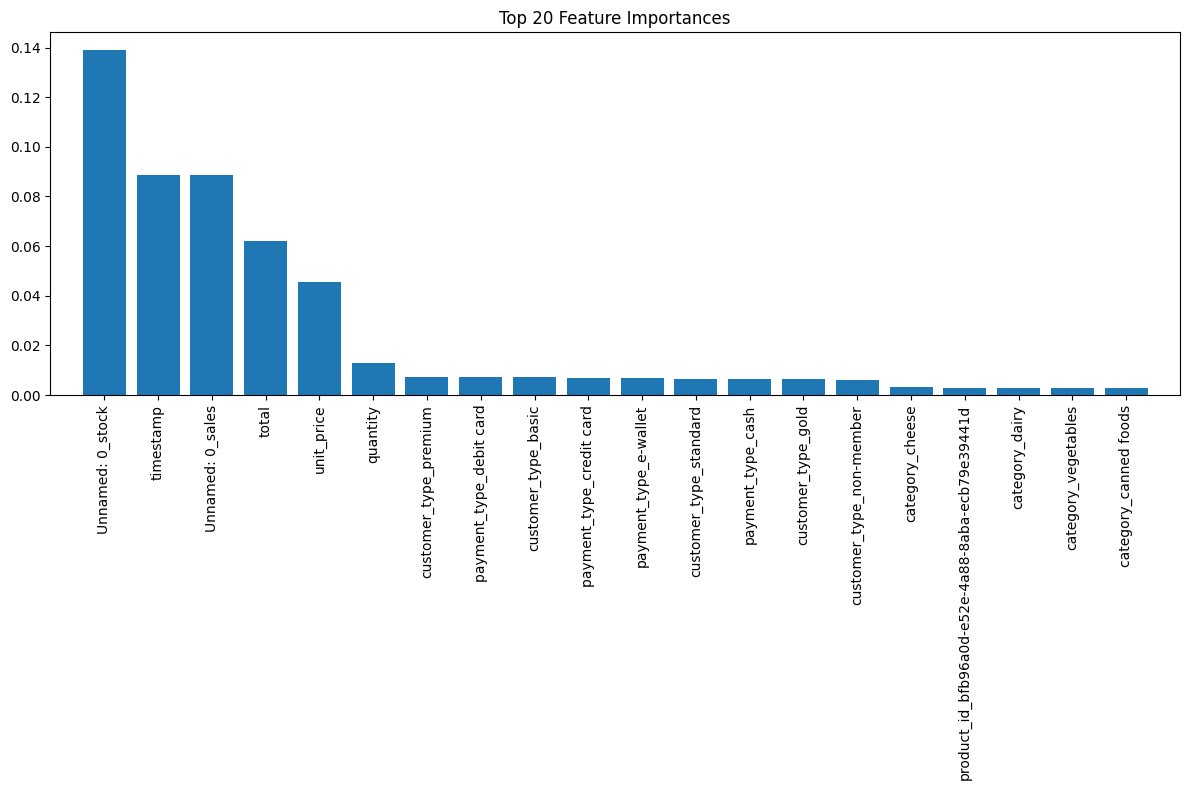

In [21]:
# Choose the number of top features you want to display, e.g., top 20
top_n = 20
top_sorted_indices = sorted_indices[:top_n]

plt.figure(figsize=(12, 8))
plt.title(f'Top {top_n} Feature Importances')
plt.bar(range(top_n), feature_importances[top_sorted_indices], align='center')
plt.xticks(range(top_n), X.columns[top_sorted_indices], rotation=90)
plt.xlim([-1, top_n])
plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import r2_score

# Make predictions using the model on the entire dataset
y_pred = rf_model.predict(X)

# Calculate R-squared score
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2:.2f}')


R-squared: 0.88
